## l’exploration et le nettoyage de dataset medtext


### Charger le dataset

Aperçu du dataset :


,Prompt,Completion
0,A 50-year-old male presents with a history of ...,This patient's history of recurrent kidney sto...
1,"A 7-year-old boy presents with a fever, headac...","This child's symptoms of a red, bulging tympan..."
2,A 35-year-old woman presents with a persistent...,While the symptoms might initially suggest ast...
3,A 50-year-old male presents with severe abdomi...,The patient's symptoms suggest an incarcerated...
4,A newborn baby presents with eye redness and a...,The infant's symptoms suggest neonatal conjunc...



Colonnes et types :
Prompt        object
Completion    object
dtype: object

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Prompt      1412 non-null   object
 1   Completion  1412 non-null   object
dtypes: object(2)
memory usage: 22.2+ KB

Valeurs manquantes par colonne :
Prompt        0
Completion    0
dtype: int64

Dataset après nettoyage :


,Prompt,Completion
0,a 50yearold male presents with a history of re...,this patients history of recurrent kidney ston...
1,a 7yearold boy presents with a fever headache ...,this childs symptoms of a red bulging tympanic...
2,a 35yearold woman presents with a persistent d...,while the symptoms might initially suggest ast...
3,a 50yearold male presents with severe abdomina...,the patients symptoms suggest an incarcerated ...
4,a newborn baby presents with eye redness and a...,the infants symptoms suggest neonatal conjunct...



Nombre de cas cliniques : 1412

10 mots les plus fréquents dans le Prompt :
[('a', 2793), ('and', 2720), ('the', 2518), ('what', 1816), ('with', 1676), ('of', 1256), ('presents', 1013), ('is', 957), ('be', 912), ('are', 719)]


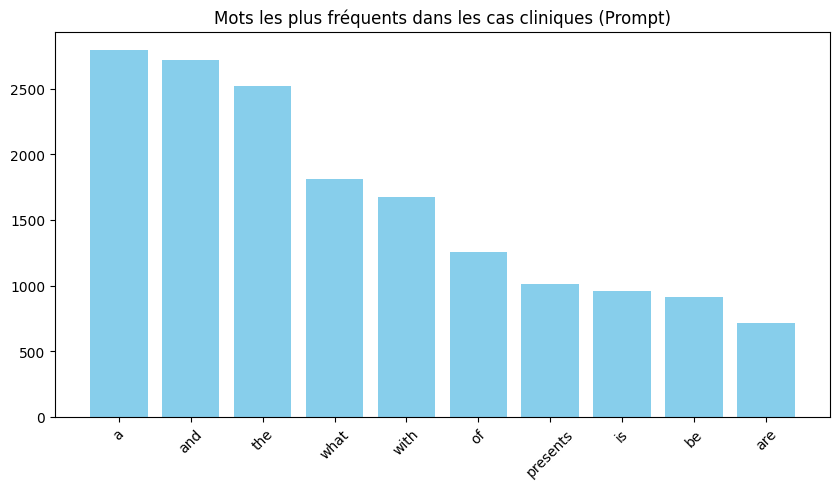


Dataset nettoyé sauvegardé dans '../data/medtext_2clean.csv'


In [5]:
# ================================
# 1️⃣ Import des librairies
# ================================
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# ================================
# 2️⃣ Charger le dataset
# ================================
df = pd.read_csv("../data/medtext_2.csv")

# Aperçu du dataset
print("Aperçu du dataset :")
display(df.head())

# Colonnes et types
print("\nColonnes et types :")
print(df.dtypes)

# Infos générales
print("\nInformations générales :")
df.info()

# ================================
# 3️⃣ Vérifier les valeurs manquantes
# ================================
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Supprimer les lignes avec valeurs manquantes
df = df.dropna()

# ================================
# 4️⃣ Nettoyer le texte
# ================================
# Convertir en minuscules et retirer espaces inutiles
df['Prompt'] = df['Prompt'].str.lower().str.strip()
df['Completion'] = df['Completion'].str.lower().str.strip()

# Retirer ponctuation et caractères spéciaux
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Retire ponctuation
    text = re.sub(r"\s+", " ", text)            # Retire espaces multiples
    return text.strip()

df['Prompt'] = df['Prompt'].apply(clean_text)
df['Completion'] = df['Completion'].apply(clean_text)

print("\nDataset après nettoyage :")
display(df.head())

# ================================
# 5️⃣ Analyse rapide du dataset
# ================================
# Nombre de cas cliniques
print("\nNombre de cas cliniques :", len(df))

# Mots les plus fréquents dans Prompt
all_words = " ".join(df['Prompt']).split()
word_counts = Counter(all_words)

print("\n10 mots les plus fréquents dans le Prompt :")
print(word_counts.most_common(10))

# Histogramme des mots les plus fréquents
words, counts = zip(*word_counts.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Mots les plus fréquents dans les cas cliniques (Prompt)")
plt.show()

# ================================
# 6️⃣ Sauvegarder le dataset nettoyé
# ================================
df.to_csv("../data/medtext_2clean.csv", index=False)
print("\nDataset nettoyé sauvegardé dans '../data/medtext_2clean.csv'")


In [6]:
import pandas as pd

# Charger le dataset nettoyé
df = pd.read_csv("../data/medtext_2clean.csv")

print("Nombre de lignes :", len(df))
df.head()

Nombre de lignes : 1412


,Prompt,Completion
0,a 50yearold male presents with a history of re...,this patients history of recurrent kidney ston...
1,a 7yearold boy presents with a fever headache ...,this childs symptoms of a red bulging tympanic...
2,a 35yearold woman presents with a persistent d...,while the symptoms might initially suggest ast...
3,a 50yearold male presents with severe abdomina...,the patients symptoms suggest an incarcerated ...
4,a newborn baby presents with eye redness and a...,the infants symptoms suggest neonatal conjunct...
